## Goal of this Notebook
Let's see if a momentum effect exists on a weekly basis

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('stock_data/tsla.csv')
weekly_movements = get_price_movements(df, period=7)

In [3]:
np.mean(weekly_movements), np.std(weekly_movements)

(1.3792402779735049, 8.3543310545454883)

In [4]:
weekly_categories = categorize_movements(weekly_movements)

## Weekly Momentum for TSLA

In [5]:
w_vbd_count = count_movement_category(weekly_categories, 'vbd')
w_bd_count = count_movement_category(weekly_categories, 'bd')
w_md_count = count_movement_category(weekly_categories, 'md')
w_sd_count = count_movement_category(weekly_categories, 'sd')
w_sg_count = count_movement_category(weekly_categories, 'sg')
w_mg_count = count_movement_category(weekly_categories, 'mg')
w_bg_count = count_movement_category(weekly_categories, 'bg')
w_vbg_count = count_movement_category(weekly_categories, 'vbg')
w_total_cat_count = len(weekly_categories)

In [6]:
w_p_vbd = w_vbd_count / w_total_cat_count
w_p_bd = w_bd_count / w_total_cat_count
w_p_md = w_md_count / w_total_cat_count
w_p_sd = w_sd_count / w_total_cat_count
w_p_sg = w_sg_count / w_total_cat_count
w_p_mg = w_mg_count / w_total_cat_count
w_p_bg = w_bg_count / w_total_cat_count
w_p_vbg = w_vbd_count / w_total_cat_count

In [7]:
w_cat_counts = [w_vbd_count, w_bd_count, w_md_count, w_sd_count, w_sg_count, w_mg_count, w_bg_count, w_vbg_count]
w_cat_probs = [w_p_vbd, w_p_bd, w_p_md, w_p_sd, w_p_sg, w_p_mg, w_p_bg, w_p_vbg]

In [8]:
w_two_day_trends = get_trends(weekly_categories, 2)

In [9]:
w_cat_probs

[0.019455252918287938,
 0.1245136186770428,
 0.13618677042801555,
 0.23346303501945526,
 0.21011673151750973,
 0.14785992217898833,
 0.10116731517509728,
 0.019455252918287938]

In [10]:
np.std(weekly_movements)

8.3543310545454883

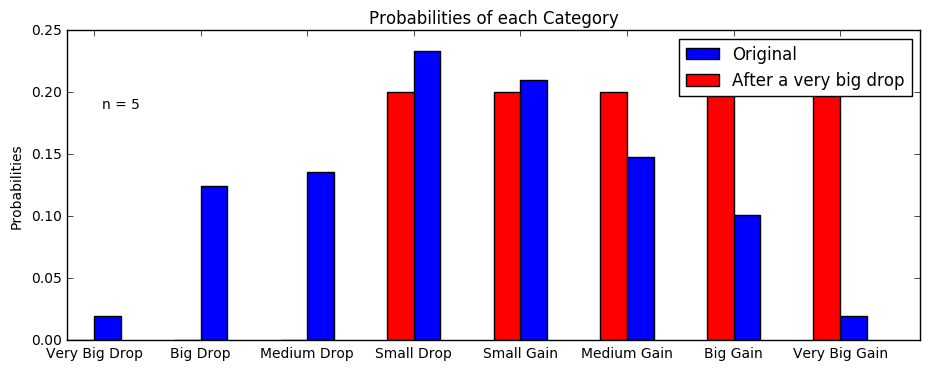

In [11]:
plot_two_day_probability_bar_graph('vbd', w_vbd_count, w_two_day_trends, w_cat_probs)
plt.show()

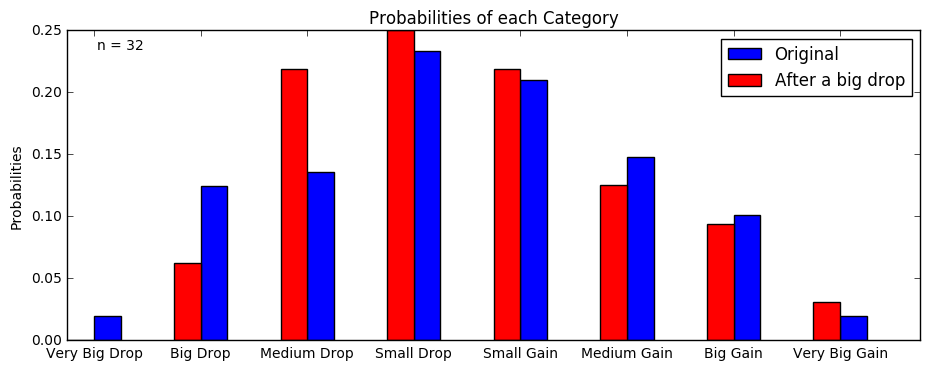

In [12]:
plot_two_day_probability_bar_graph('bd', w_bd_count, w_two_day_trends, w_cat_probs)
plt.show()

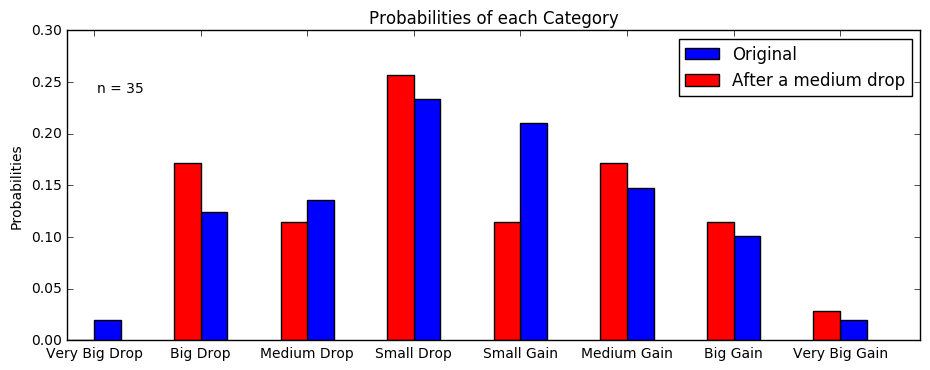

In [13]:
plot_two_day_probability_bar_graph('md', w_md_count, w_two_day_trends, w_cat_probs)
plt.show()

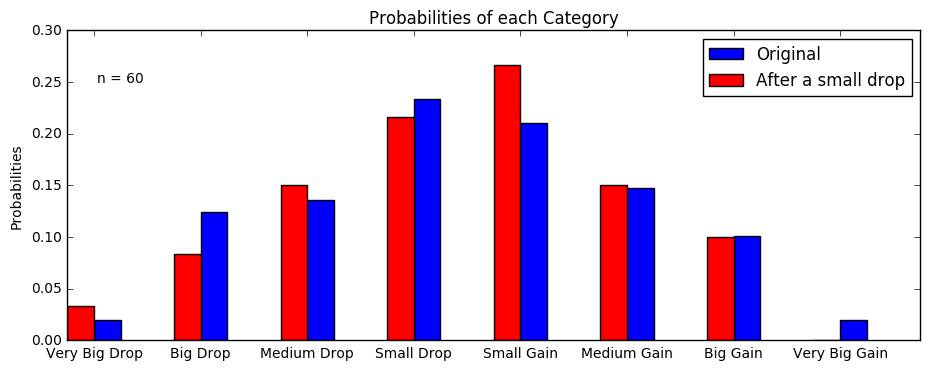

In [14]:
plot_two_day_probability_bar_graph('sd', w_sd_count, w_two_day_trends, w_cat_probs)
plt.show()

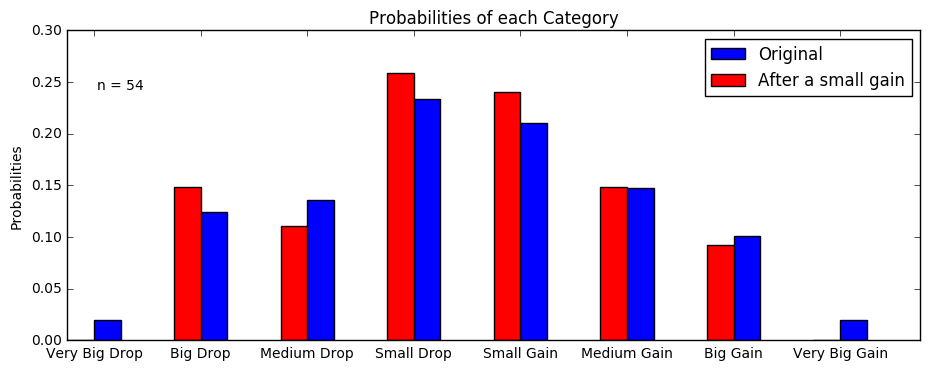

In [15]:
plot_two_day_probability_bar_graph('sg', w_sg_count, w_two_day_trends, w_cat_probs)
plt.show()

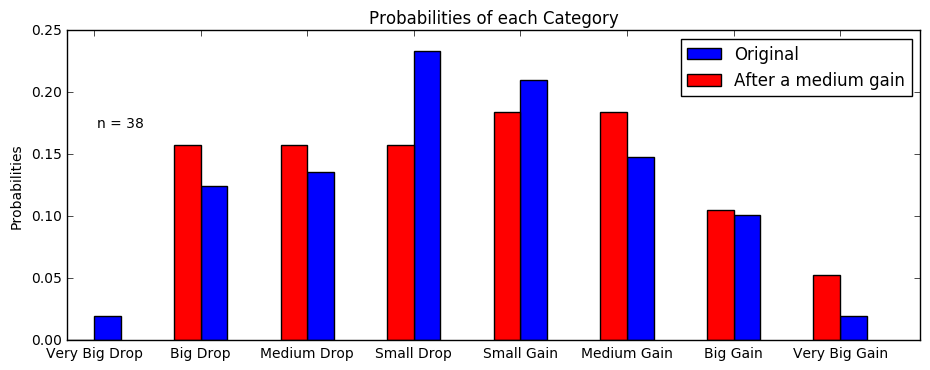

In [16]:
plot_two_day_probability_bar_graph('mg', w_mg_count, w_two_day_trends, w_cat_probs)
plt.show()

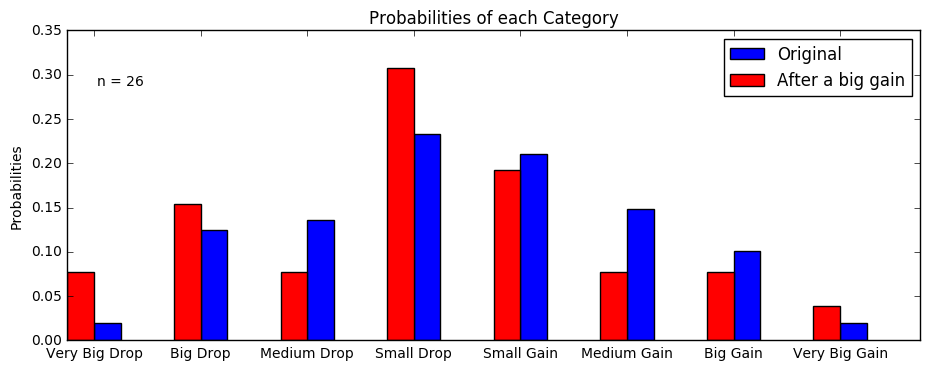

In [17]:
plot_two_day_probability_bar_graph('bg', w_bg_count, w_two_day_trends, w_cat_probs)
plt.show()

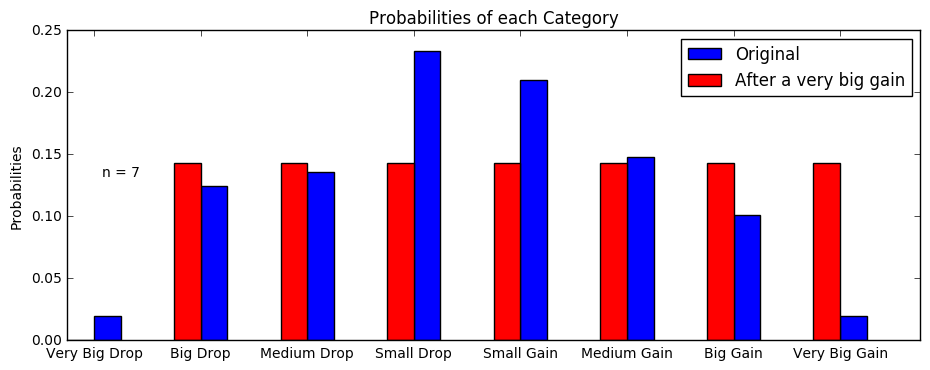

In [18]:
plot_two_day_probability_bar_graph('vbg', w_vbg_count, w_two_day_trends, w_cat_probs)
plt.show()

It looks like on a weekly level, there is very little momentum, but a more pronounced "snap back" effect. At least for TSLA

## Weekly Momentum for All Stocks

In [19]:
## Take in period_length, trend_length, and all_categories
## Return all_trends, all_cat_counts, all_cat_probs
def get_trends_all_stocks(period_length, trend_length, all_category_names):
    """
    Get an aggregate of trends for all stocks, from a specified period_length (1 would be daily, 7 weekly, etc.),
    a specified trend_length(2 would be looking for two day trends), and a list all_category_names that contains
    each possible category name.
    
    We return: 
      all_trends          -- The aggregate list of all trends accross stocks
      all_category_counts -- The aggregate count of each category accross stocks
      all_category_probs  -- The probability of each category accross stocks
    """
    g = glob.glob('stock_data/*.csv')
    
    all_movements = []
    all_movement_categories = []
    all_trends = []
    
    all_category_counts = np.zeros(len(all_category_names), dtype=np.int)
    total_count = 0
    
    for i in range(len(g)):
        df = pd.DataFrame()
        df = df.from_csv(g[i])
        
        movements = get_price_movements(df, period=period_length)
        movement_categories = categorize_movements(movements)
        
        all_movements.extend(movements)
        all_movement_categories.extend(movement_categories)
        
        for j in range(len(all_category_names)):
            all_category_counts[j] += count_movement_category(movement_categories, all_category_names[j])
        
        trends = get_trends(movement_categories, trend_length)
        all_trends.extend(trends)
    
    all_category_probs = np.zeros(len(all_category_names), dtype=np.float)
    total_count = len(all_movement_categories)
    for i in range(len(all_category_names)):
        all_category_probs[i] = (all_category_counts[i] / total_count)
    
    return (all_trends, all_category_counts, all_category_probs)

In [20]:
period_length = 7 
trend_length = 2
all_category_names = ['vbd', 'bd', 'md', 'sd', 'sg', 'mg', 'bg', 'vbg']
all_trends, all_category_counts, all_category_probs = get_trends_all_stocks(period_length, trend_length, all_category_names)

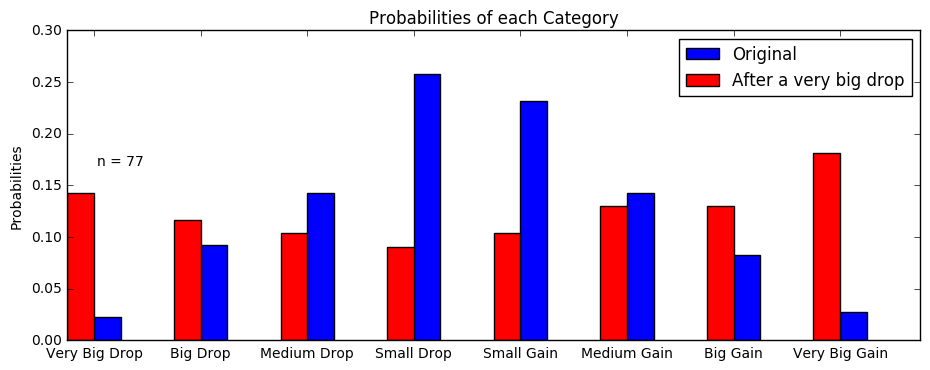

In [21]:
plot_two_day_probability_bar_graph('vbd', all_category_counts[0], all_trends, all_category_probs)
plt.show()

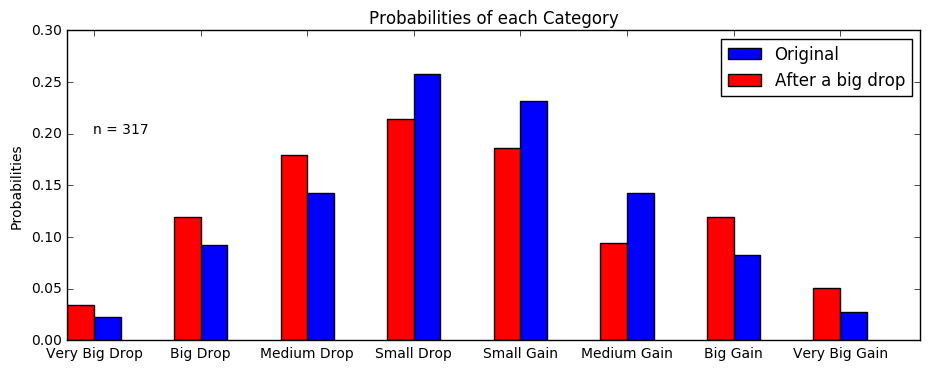

In [22]:
plot_two_day_probability_bar_graph('bd', all_category_counts[1], all_trends, all_category_probs)
plt.show()

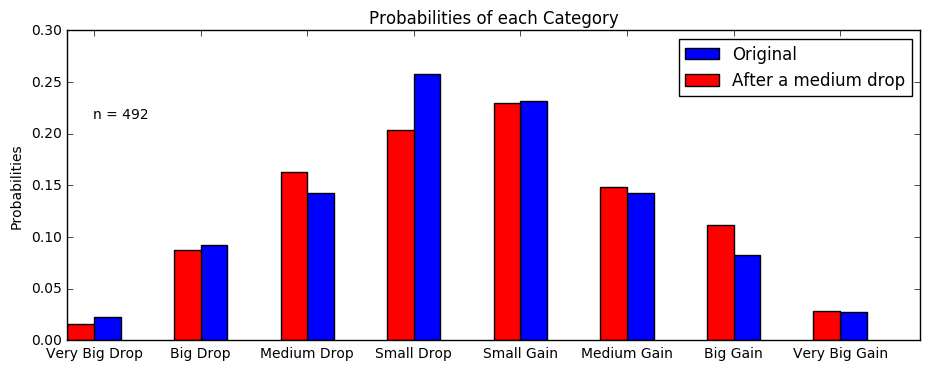

In [23]:
plot_two_day_probability_bar_graph('md', all_category_counts[2], all_trends, all_category_probs)
plt.show()

Looks like there is a positive snap-back here

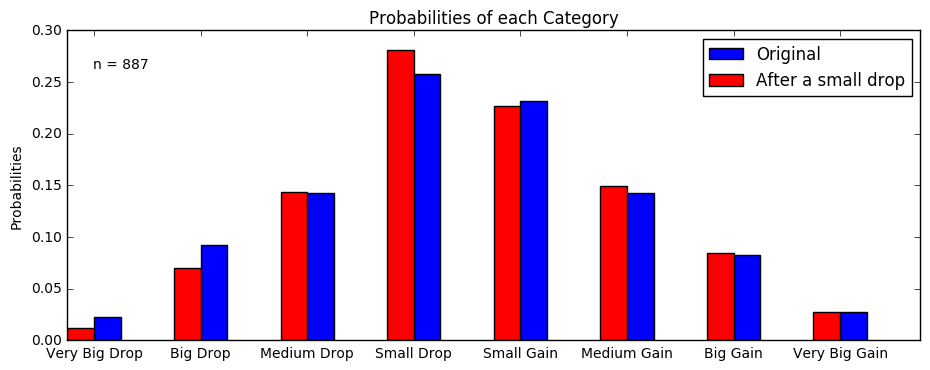

In [24]:
plot_two_day_probability_bar_graph('sd', all_category_counts[3], all_trends, all_category_probs)
plt.show()

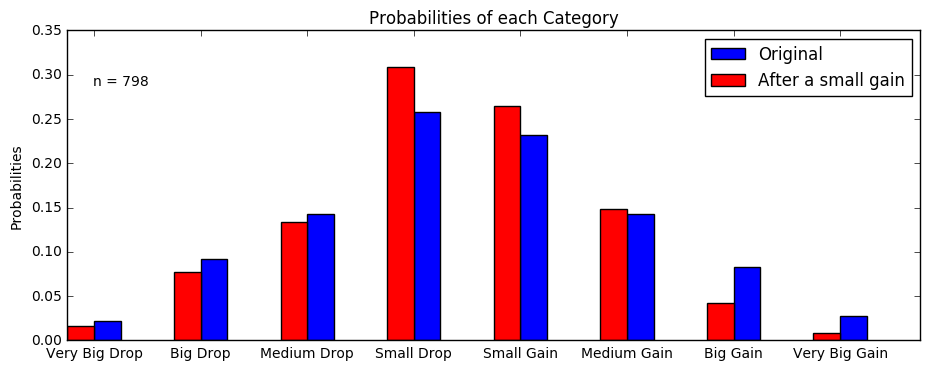

In [25]:
plot_two_day_probability_bar_graph('sg', all_category_counts[4], all_trends, all_category_probs)
plt.show()

Small weekly movements in either direction make a small drop more likely the following week. This may be a result of lack of interest... I wonder if the volume data would reflect this.

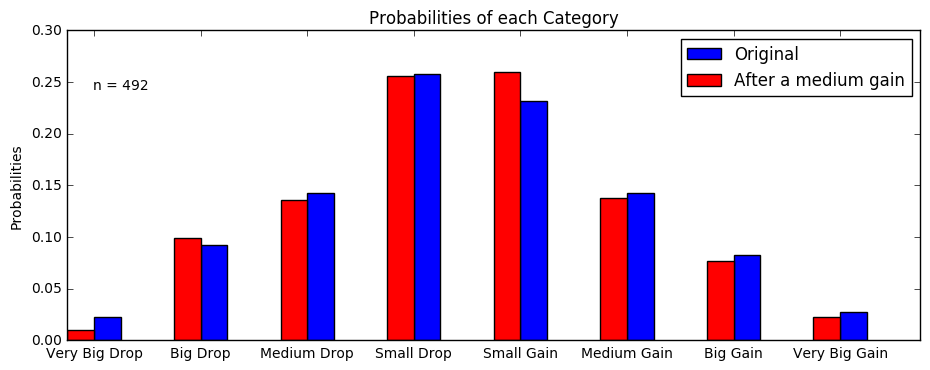

In [26]:
plot_two_day_probability_bar_graph('mg', all_category_counts[5], all_trends, all_category_probs)
plt.show()

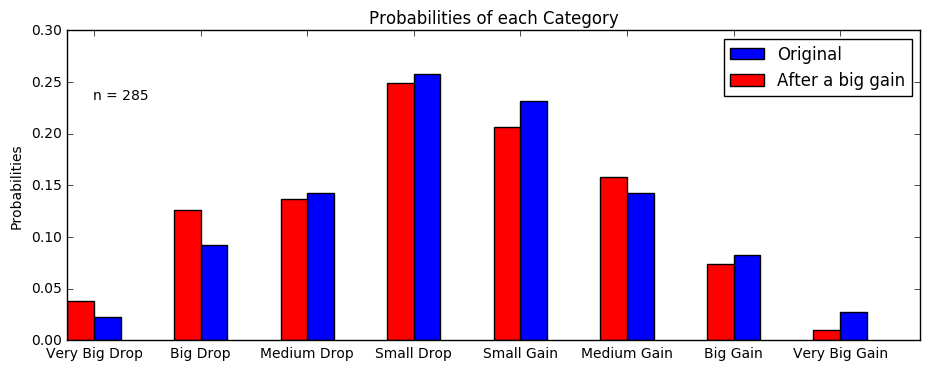

In [27]:
plot_two_day_probability_bar_graph('bg', all_category_counts[6], all_trends, all_category_probs)
plt.show()

Large snap-back effect here

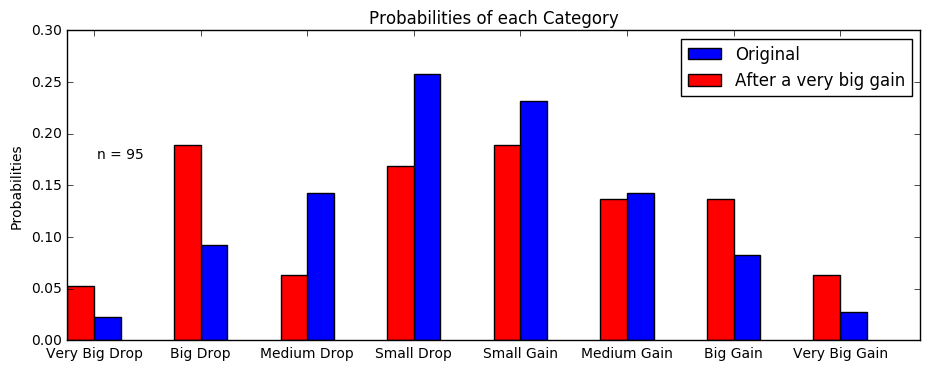

In [28]:
plot_two_day_probability_bar_graph('vbg', all_category_counts[7], all_trends, all_category_probs)
plt.show()

There is some momentum, and some tendency to revert towards the mean. (However, very big drops tend to cause very high volatility in both directions, and are skewed towards good returns).  
Also, gains that are large, but not > 2sigma, are very likely to snap back.

It would be interesting to consider if this effect is more present in growth stocks, possibly where there is more emotion involved and thus more of a snap back effect? We can explore this later.